In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hrp-dataset/sample_output_generated.csv
/kaggle/input/hrp-dataset/sample_test_data.csv
/kaggle/input/hrp-dataset/train_data.csv


In [10]:
# # pd.set_option('display.max_rows')
# pd.set_option('display.max_columns')
# # pd.set_option('display.width',)

In [11]:
df=pd.read_csv('/kaggle/input/hrp-dataset/train_data.csv')

In [12]:
df.head(4)

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,de843d67-0ed3-4dfe-af91-78923dc31810,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675


In [13]:
df.shape

(5000, 37)

In [14]:
df.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               5000 non-null   object 
 1   VLF                5000 non-null   float64
 2   VLF_PCT            5000 non-null   float64
 3   LF                 5000 non-null   float64
 4   LF_PCT             5000 non-null   float64
 5   LF_NU              5000 non-null   float64
 6   HF                 5000 non-null   float64
 7   HF_PCT             5000 non-null   float64
 8   HF_NU              5000 non-null   float64
 9   TP                 5000 non-null   float64
 10  LF_HF              5000 non-null   float64
 11  HF_LF              5000 non-null   float64
 12  SD1                5000 non-null   float64
 13  SD2                5000 non-null   float64
 14  sampen             5000 non-null   float64
 15  higuci             5000 non-null   float64
 16  datasetId          5000 

In [16]:
df.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2242.846274,64.618473,944.666618,33.756563,95.513467,39.787329,1.624964,4.486533,3227.300221,111.958521,...,0.564676,0.070378,5.114420e-07,-0.000448,0.018638,0.009758,0.009758,2.005098,0.564676,0.070378
std,1853.845285,16.858102,572.705322,16.121002,4.200091,46.887627,1.793648,4.200091,1957.986129,330.772146,...,1.738594,0.706996,1.662361e-04,0.000878,0.005468,0.003953,0.003953,0.378332,1.738594,0.706996
min,182.001656,19.492924,105.352082,2.218141,70.677164,0.063182,0.002234,0.013127,393.870306,2.410311,...,-1.851368,-2.130673,-1.049175e-03,-0.004361,0.008992,0.003645,0.003645,1.188950,-1.851368,-2.130673
25%,1009.686180,52.998781,547.027436,21.775991,93.560684,10.946137,0.347487,1.241594,1863.994785,14.529600,...,-0.347156,-0.340853,-7.130486e-05,-0.000911,0.014335,0.006999,0.006999,1.744527,-0.347156,-0.340853
50%,1705.183308,66.792593,779.619006,31.364370,96.583947,24.939947,1.023576,3.416053,2826.860362,28.273553,...,0.065799,-0.042454,1.639271e-06,-0.000297,0.017363,0.008766,0.008766,1.936696,0.065799,-0.042454
75%,2678.847972,77.328811,1199.089822,44.458585,98.758406,45.549542,2.276872,6.439316,4085.011726,79.541694,...,0.782407,0.342719,6.955046e-05,0.000161,0.021882,0.011538,0.011537,2.220642,0.782407,0.342719
max,12278.649761,97.703187,3211.424686,77.507972,99.986873,359.927420,12.533266,29.322836,13119.276456,7617.164272,...,16.367846,3.626919,9.518686e-04,0.002038,0.036017,0.026660,0.026660,3.676899,16.367846,3.626919


In [17]:
df.isnull().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [18]:
y=df['HR']
y

0       72.947850
1       63.063063
2       83.191736
3       80.828414
4       76.299115
          ...    
4995    83.920808
4996    79.969017
4997    57.844321
4998    66.656028
4999    83.364080
Name: HR, Length: 5000, dtype: float64

In [19]:
columns_to_drop = ['uuid', 'condition', 'datasetId','HR','VLF','LF','SD1']

# Drop the specified columns
df1=df.drop(columns=columns_to_drop, axis=1)

In [20]:
df1.corr()

,VLF_PCT,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD2,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
VLF_PCT,1.000000,-0.995081,0.053058,-0.274047,-0.455164,-0.053058,0.476993,0.098055,-0.048424,0.583433,...,0.108982,0.238847,0.027555,0.579831,-0.331516,-0.324614,-0.324615,0.278907,0.108982,0.238847
LF_PCT,-0.995081,1.000000,0.038843,0.204972,0.364714,-0.038843,-0.458702,-0.074745,-0.043294,-0.578994,...,-0.125362,-0.249145,-0.028994,-0.596020,0.313591,0.276294,0.276294,-0.215728,-0.125362,-0.249145
LF_NU,0.053058,0.038843,1.000000,-0.762434,-0.847794,-1.000000,0.163818,0.292868,-0.996007,0.011879,...,-0.221804,-0.199322,-0.027350,-0.134099,-0.264521,-0.597508,-0.597508,0.757570,-0.221804,-0.199322
HF,-0.274047,0.204972,-0.762434,1.000000,0.733451,0.762434,0.091923,-0.226355,0.772219,0.040338,...,0.082372,0.177450,0.016123,-0.147254,0.729333,0.881525,0.881525,-0.580377,0.082372,0.177450
HF_PCT,-0.455164,0.364714,-0.847794,0.733451,1.000000,0.847794,-0.360418,-0.249797,0.844245,-0.279666,...,0.102438,-0.005594,0.001616,-0.092771,0.297349,0.567697,0.567698,-0.682459,0.102438,-0.005594
HF_NU,-0.053058,-0.038843,-1.000000,0.762434,0.847794,1.000000,-0.163818,-0.292868,0.996007,-0.011879,...,0.221804,0.199322,0.027350,0.134099,0.264521,0.597508,0.597508,-0.757570,0.221804,0.199322
TP,0.476993,-0.458702,0.163818,0.091923,-0.360418,-0.163818,1.000000,0.157338,-0.148883,0.745331,...,-0.093026,0.195014,-0.001342,0.055224,0.471634,0.240846,0.240845,0.312842,-0.093026,0.195014
LF_HF,0.098055,-0.074745,0.292868,-0.226355,-0.249797,-0.292868,0.157338,1.000000,-0.270393,0.020226,...,-0.089564,-0.091784,0.022551,-0.067394,-0.062602,-0.206982,-0.206983,0.438786,-0.089564,-0.091784
HF_LF,-0.048424,-0.043294,-0.996007,0.772219,0.844245,0.996007,-0.148883,-0.270393,1.000000,-0.008328,...,0.211438,0.192192,0.026146,0.125189,0.276770,0.601044,0.601045,-0.725814,0.211438,0.192192
SD2,0.583433,-0.578994,0.011879,0.040338,-0.279666,-0.011879,0.745331,0.020226,-0.008328,1.000000,...,-0.104552,0.268281,0.037907,0.194993,0.243192,0.159102,0.159101,0.126631,-0.104552,0.268281


In [21]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 
corr_features=correlation(df1,0.8)
len(corr_features)

14

In [22]:
df3 = df[['HF', 'HF_LF', 'HF_NU', 'HF_PCT', 'KURT_REL_RR', 'LF_PCT', 'MEDIAN_RR', 'RMSSD_REL_RR', 'SD2', 'SDRR', 'SDRR_REL_RR', 'SDRR_RMSSD', 'SDRR_RMSSD_REL_RR', 'SDSD', 'SDSD_REL_RR', 'SKEW_REL_RR', 'higuci', 'pNN25', 'pNN50']]


In [23]:
df2=df1.drop(corr_features,axis=1)

In [24]:
df2.columns

Index(['VLF_PCT', 'LF_NU', 'HF', 'TP', 'LF_HF', 'SD2', 'sampen', 'higuci',
       'MEAN_RR', 'RMSSD', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR'],
      dtype='object')

In [25]:
# sns.pairplot( df1,x_vars=df1.columns, y_vars=y, size=7, aspect=0.7)

In [26]:
# sns.scatterplot(data=df, x='SD1', y=y)
# plt.show()

In [27]:
# plt.scatter(df['VLF_PCT'], y)

# # Add labels and title
# plt.xlabel('X-axis label')
# plt.ylabel('Y-axis label')
# plt.title('Scatter Plot Example')

# # Show plot
# plt.show()

In [28]:
# plt.scatter(df['LF'], y)

# # Add labels and title
# plt.xlabel('X-axis label')
# plt.ylabel('Y-axis label')
# plt.title('Scatter Plot Example')

# # Show plot
# plt.show()

In [29]:
# plt.scatter(df['LF_PCT'], y)

# # Add labels and title
# plt.xlabel('X-axis label')
# plt.ylabel('Y-axis label')
# plt.title('Scatter Plot Example')

# # Show plot
# plt.show()

In [30]:
# import statsmodels.api as sm

# # Generate some example data

# # Create a Q-Q plot

# sm.qqplot(df2['MEDIAN_REL_RR'], line='45')
# plt.title('Q-Q Plot')
# plt.show()

In [31]:
df2.shape,y.shape

((5000, 16), (5000,))

# Linear Regression

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming X and y are your feature matrix and target variable respectively
# Generate some example data


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=42)


scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data


# Print the coefficients
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)


# Plot the regression line
# plt.scatter(X_test, y_test, color='blue')
# plt.plot(X_test, y_pred, color='red')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.title('Linear Regression')
# plt.show()
y_pred = model.predict(X_test_scaled)
# y_pred
y_train_pred = model.predict(X_train_scaled)

# Predictions on test set
y_test_pred = model.predict(X_test_scaled)

# Compute Mean Squared Error (MSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Compute R-squared (R^2) for training and testing sets
# train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
# print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Test MSE: 2.5340397246108806
Test R-squared: 0.9764487415265068


In [33]:
X_train_scaled

array([[ 1.47359943e+00,  8.55213309e-01, -7.22547270e-01, ...,
        -6.96663872e-01, -8.26695140e-01,  1.74454585e+00],
       [-1.07791722e+00, -3.23776853e-01, -5.09435389e-02, ...,
         5.26789131e-01,  1.55723018e+00, -8.01346096e-01],
       [ 6.44107558e-03,  8.37200832e-01, -5.96488484e-01, ...,
         2.81444049e-01, -4.61145718e-01, -2.36548723e-02],
       ...,
       [-1.84471753e+00,  1.88542981e-01,  2.69195725e-01, ...,
        -2.24415263e-01, -5.91036612e-01, -4.69862892e-01],
       [ 1.88030305e-01,  9.63677763e-01, -7.97167596e-01, ...,
        -1.78536294e-01,  6.43565260e-01,  6.07947012e-01],
       [-1.31156476e+00, -2.40181995e-04,  9.24706897e-01, ...,
         5.13708164e-01,  4.51361024e-01, -2.71288752e-01]])

# **Ridge to confirm that model is not overfitted**

In [34]:
from sklearn.linear_model import Ridge
alpha = 0.1  # regularization parameter
ridge = Ridge(alpha=alpha)

# Fit the model to the scaled training data
ridge.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model, e.g., calculate metrics
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 2.533907690326194


0.9764499686475877

In [35]:
# re=pd.DataFrame(y_pred,y_test)
# re

# **Decision tree**

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

# Fit the model to the training data
dt_regressor.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_d = dt_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_d)
r2 = r2_score(y_test, y_pred_d)
print("Mean Squared Error:", mse)
# y_pred_d
r2

Mean Squared Error: 0.26763596806167966


0.9975126025849528

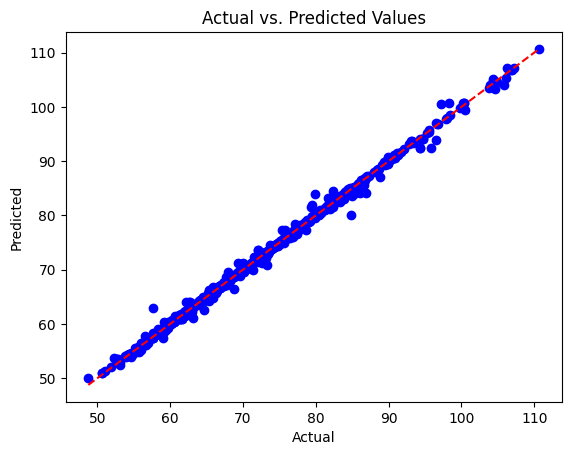

In [37]:
plt.scatter(y_test, y_pred_d, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Add a diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Support vector regression

In [38]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for non-linear regression

# Fit the model to the scaled training data
svr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_s = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_s)
print("Mean Squared Error:", mse)
# y_pred_s
r2 = r2_score(y_test, y_pred_s)
r2

Mean Squared Error: 3.733860307228597


0.9652976595649223

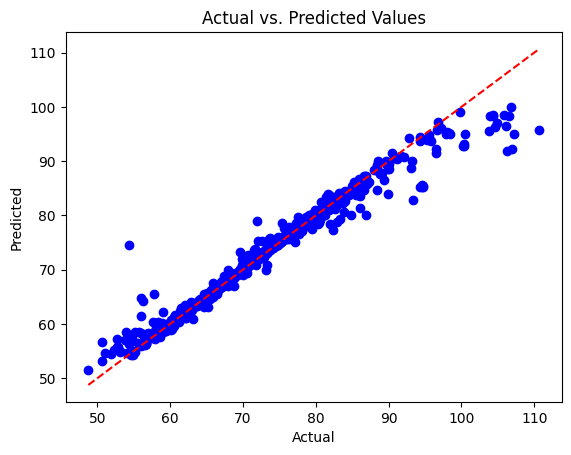

In [39]:
plt.scatter(y_test, y_pred_s, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Add a diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [40]:
y_train_truncated = y_train.values[:len(y_pred)]

# Calculate residuals and mean residuals
residuals = y_train_truncated - y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals: {}".format(mean_residuals))

Mean of Residuals: 0.8888623341732409


/tmp/ipykernel_34/3040778317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


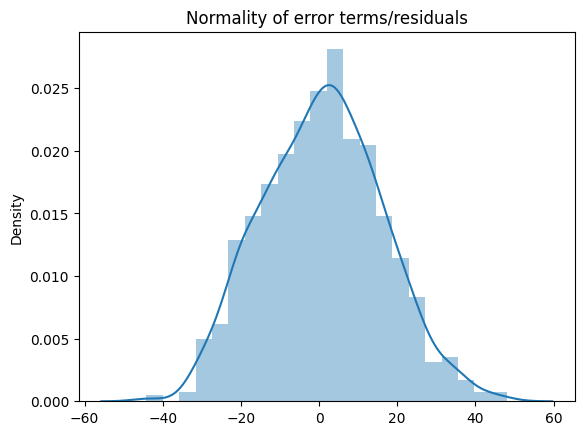

In [41]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [42]:
df2.columns

Index(['VLF_PCT', 'LF_NU', 'HF', 'TP', 'LF_HF', 'SD2', 'sampen', 'higuci',
       'MEAN_RR', 'RMSSD', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


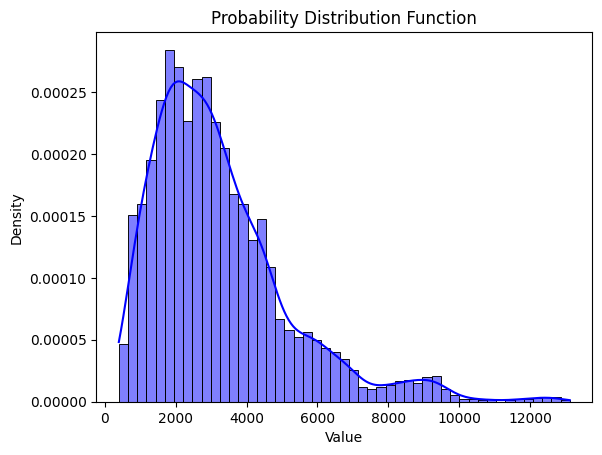

In [43]:
sns.histplot(df2['TP'], kde=True, stat='density', color='blue')
plt.title('Probability Distribution Function')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [44]:
df2['TP'] = np.log(df2['TP'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


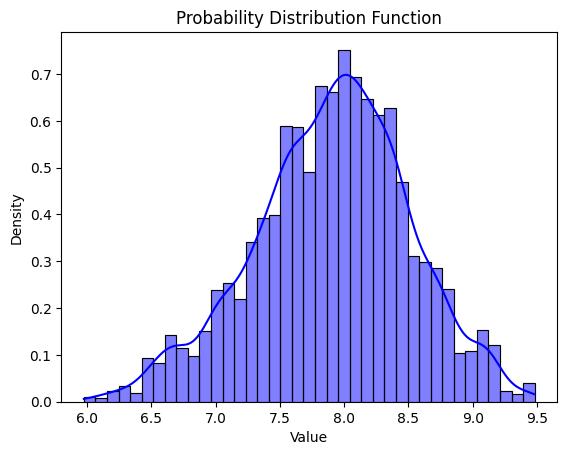

In [45]:
sns.histplot(df2['TP'], kde=True, stat='density', color='blue')
plt.title('Probability Distribution Function')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [46]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=0.0001, random_state=42)

# Fit the model to the training data
sgd_regressor.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_e = sgd_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_e)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred_e)
r2

Mean Squared Error: 2.52035461809476


0.9765759303300872

In [76]:
from sklearn.preprocessing import PolynomialFeatures
model_poly=PolynomialFeatures(degree=2)

In [77]:
X_poly=model_poly.fit_transform(X_train_scaled)
X_test_poly=model_poly.transform(X_test_scaled)

In [49]:
X_poly.shape,X_train_scaled.shape

((4000, 153), (4000, 16))

In [73]:
model_poly4 = LinearRegression()

# Fit the model to the scaled training data
model_poly4.fit(X_poly, y_train)
y_pred_poly = model_poly4.predict(X_test_poly)

# Compute Mean Squared Error (MSE) for training and testing sets
# train_mse = mean_squared_error(y_train, y_train_pred)
# test_mse = mean_squared_error(y_test, y_test_pred)

# Compute R-squared (R^2) for training and testing sets
# train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred_poly)

# print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
# print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Test MSE: 2.5340397246108806
Test R-squared: 0.9993806806746935


In [51]:
from sklearn.linear_model import Lasso
alpha = 0.01  # regularization parameter
ridge = Lasso(alpha=alpha)

# Fit the model to the scaled training data
ridge.fit(X_poly, y_train)

# Make predictions on the scaled test data
y_pred_pol = ridge.predict(X_test_poly)

# Evaluate the model, e.g., calculate metrics
mse = mean_squared_error(y_test, y_pred_pol)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.1128991244187765


0.9764499686475877

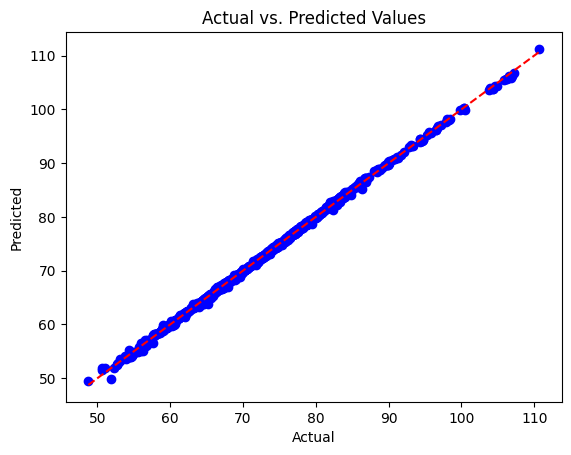

In [52]:
plt.scatter(y_test, y_pred_poly, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Add a diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [87]:
sample=pd.read_csv('/kaggle/input/hrp-dataset/sample_test_data.csv')
sample_out=pd.read_csv('/kaggle/input/hrp-dataset/sample_output_generated.csv')

In [88]:
t=sample_out['HR']

In [58]:
sample1=sample[['VLF_PCT', 'LF_NU', 'HF', 'TP', 'LF_HF', 'SD2', 'sampen', 'higuci','MEAN_RR', 'RMSSD', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR','MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR']]


In [70]:
sample1

,VLF_PCT,LF_NU,HF,TP,LF_HF,SD2,sampen,higuci,MEAN_RR,RMSSD,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR
0,43.053026,95.891158,56.421352,2411.311962,23.337758,96.496946,2.191514,1.250181,803.900075,18.304867,0.266667,-0.165101,-0.224105,-0.000032,-0.000942,1.783259
1,27.758342,95.698188,119.720039,3852.367156,22.246016,111.790988,2.220826,1.215807,750.408683,23.743897,3.266667,-0.729494,0.169267,0.000129,-0.002245,1.863380
2,62.673708,99.503494,3.087286,1665.856933,200.407488,82.241317,2.145743,1.185702,966.469471,12.319551,0.200000,0.408727,-0.099498,-0.000022,0.000121,2.122806
3,73.598925,98.564819,23.617762,6233.192027,68.677630,376.006980,1.590530,1.161755,952.602206,21.240562,3.533333,6.720692,2.506984,-0.000093,-0.001052,2.017539
4,49.193639,98.727334,24.156100,3735.891274,77.575202,137.267662,2.183957,1.224388,941.681645,21.842635,2.000000,-0.320871,-0.007052,0.000090,-0.000726,1.914702
5,75.997179,99.682398,3.541575,4645.695209,313.859349,224.458236,2.068988,1.136577,1096.614477,18.575892,0.933333,-0.387270,-0.688624,-0.000122,0.000249,2.510395
6,45.760972,98.885322,20.501856,3391.030914,88.711985,156.472787,2.114351,1.121038,811.677189,16.891796,0.600000,0.284505,-0.671509,-0.000108,-0.001484,2.434965
7,56.090003,99.442841,9.902017,4047.446811,178.481993,145.355313,2.182884,1.221746,972.344647,21.524019,1.533333,-0.150722,-0.389360,-0.000166,-0.001134,2.036544
8,86.726313,99.000217,8.260761,6224.763460,99.021727,449.508478,2.138832,1.069341,1156.488582,17.776803,2.733333,-1.051725,0.170944,-0.000218,-0.000510,2.598129
9,73.937431,95.948462,20.373698,1929.446418,23.681985,113.139612,1.986939,1.218112,850.861616,11.492573,0.000000,-0.060943,-0.676414,0.000072,0.000305,1.830086


In [81]:
sample_scaled = scaler.transform(sample1)

In [83]:
X_poly_sample=model_poly.fit_transform(sample_scaled)

In [85]:
y_sample = model_poly4.predict(X_poly_sample)


In [92]:
pd.DataFrame(y_sample,t)

,0
HR,
75.206050,75.188049
80.870132,80.853638
62.313063,62.372925
66.336924,66.355316
64.422596,64.330109
56.061095,56.869934
75.543673,75.825653
62.458281,62.420685
56.271876,56.876404


In [96]:
# import pandas as pd

# # Define the column names
# column_names = ['VLF_PCT', 'LF_NU', 'HF', 'TP', 'LF_HF', 'SD2', 'sampen', 'higuci',
#                 'MEAN_RR', 'RMSSD', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
#                 'MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR']

# # Empty dictionary to store user input
# user_data = {}

# # Taking input from the user for each column
# for column in column_names:
#     user_input = input(f"Enter value for {column}: ")
#     # Convert input to float
#     try:
#         user_data[column] = float(user_input)
#     except ValueError:
#         print(f"Invalid input for {column}. Please enter a valid floating point number.")

# # Create DataFrame from user input
# df9 = pd.DataFrame([user_data])

# print("\nDataFrame:")
# print(df)
